In [5]:
import pm4py
import pandas as pd

In [6]:
# simply load a CSV file as an event log using pandas
# (we don't need the extra features of the XES format)
log = pd.read_csv("simple log.csv")

# (but, we will have to convert to datetimes manually)
log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])

log

,case:concept:name,concept:name,time:timestamp
0,patientA,Decision1,2024-09-16 00:00:00
1,patientA,Decision2,2024-09-16 00:00:01
2,patientA,Decision3,2024-09-16 00:00:02
3,patientB,Decision1,2024-09-16 00:00:00
4,patientB,Decision2,2024-09-16 00:00:01
5,patientB,Decision3,2024-09-16 00:00:02
6,patientC,Decision1,2024-09-16 00:00:00
7,patientC,Decision4,2024-09-16 00:00:01
8,patientC,Decision5,2024-09-16 00:00:02
9,patientD,Decision1,2024-09-16 00:00:00


In [7]:
# get the unique variants in the log

pm4py.get_variants(log)

# there are 3 variants;
# - the first variant covers the first two traces (since their activities & ordering is identical)
# - the second covers the third trace
# - the third covers the fourth trace (activities are the same as the third trace, but different ordering)

{('Decision1', 'Decision2', 'Decision3'): 2,
 ('Decision1', 'Decision4', 'Decision5'): 1,
 ('Decision1', 'Decision5', 'Decision4'): 1}

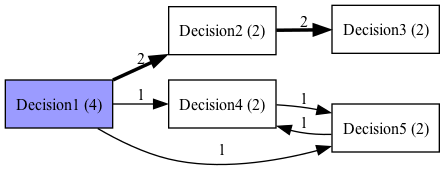

In [8]:
# visualize the event log as a simple directly-follows graph.

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer

# discover
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)

# visualize
# numbers inside boxes (in parenthesis) are the number of times the "activity"/decision occurred
# numbers on edges are the number of times the sequence occurred
# (e.g., the number of times that Decision1 was followed by Decision2)
gviz = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)